In [37]:
import json 
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Create an empty list to store data from all JSON files
data_list = []

# Get the file path of the directory containing the JSON files
json_dir = '../data/'

# Iterate over each file in the directory
for filename in os.listdir(json_dir):
    if filename.endswith('.json'):
        # Extract the position number from the filename
        position = int(filename.split('.')[0].replace('position', ''))
        
        # Read the JSON file into a DataFrame
        file_path = os.path.join(json_dir, filename)
        
        df = pd.read_json(file_path)
        
        # Add a new column 'position' with the value of the position number
        df['position'] = position
        
        # Append the DataFrame to the list
        data_list.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_list)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

In [39]:
# Sort the combined_df DataFrame by the 'position' column in ascending order
combined_df_sorted = combined_df.sort_values('position')

# Reset the index of the sorted DataFrame
combined_df_sorted.reset_index(drop=True, inplace=True)

In [40]:
# Define a function to calculate the percentage quality
def calculate_percentage(quality):
    numerator, denominator = map(int, quality.split('/'))
    return int((numerator / denominator) * 100)

# Add a new column 'percentage_quality' based on the 'quality' column
combined_df_sorted['percentage_quality'] = combined_df_sorted['quality'].apply(calculate_percentage)

In [41]:
combined_df_sorted

,ssid,quality,signal,mac,position,percentage_quality
0,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100
1,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100
2,NOKIA-402343AC9C25-5,70/70,-21,40:23:43:AC:9C:32,1,100
3,NOKIA-402343AC9C25-5,70/70,-25,40:23:43:AC:9C:32,1,100
4,NOKIA-402343AC9C25-5,70/70,-26,40:23:43:AC:9C:32,1,100
...,...,...,...,...,...,...
1095,NOKIA-402343AC9C25-5,59/70,-51,40:23:43:AC:9C:32,11,84
1096,NOKIA-402343AC9C25-5,54/70,-56,40:23:43:AC:9C:32,11,77
1097,NOKIA-402343AC9C25-5,54/70,-56,40:23:43:AC:9C:32,11,77
1098,NOKIA-402343AC9C25-5,53/70,-57,40:23:43:AC:9C:32,11,75


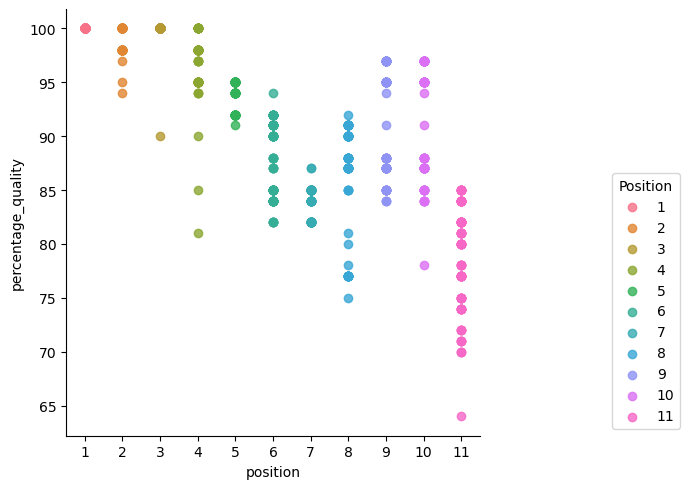

In [51]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( 
    x="position", 
    y="percentage_quality", 
    data=combined_df_sorted, 
    fit_reg=True, 
    hue='position', 
    legend=False
)

# Set the x-axis ticks to show all integer values
plt.xticks(range(1, len(combined_df_sorted['position'].unique()) + 1))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0), title='Position')

plt.show()

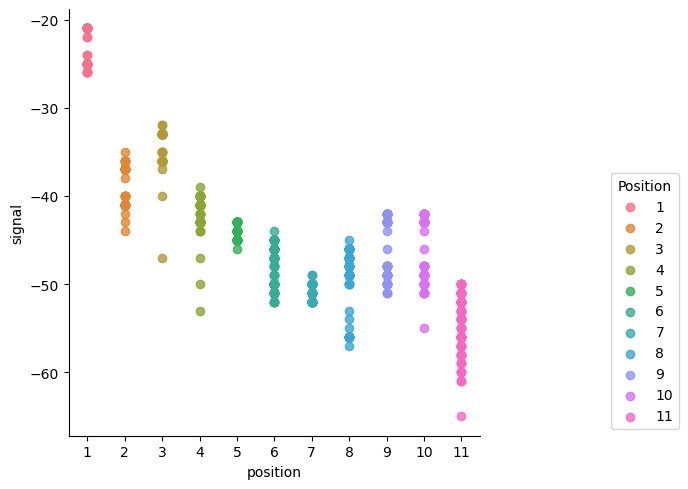

In [52]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( 
    x="position", 
    y="signal", 
    data=combined_df_sorted, 
    fit_reg=True, 
    hue='position', 
    legend=False
)

# Set the x-axis ticks to show all integer values
plt.xticks(range(1, len(combined_df_sorted['position'].unique()) + 1))
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.0), title='Position')

plt.show()